In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('./house_price.csv',usecols=['Neighborhood','Exterior1st','SalePrice'])


In [3]:
df

,Neighborhood,Exterior1st,SalePrice
0,CollgCr,VinylSd,208500
1,Veenker,MetalSd,181500
2,CollgCr,VinylSd,223500
3,Crawfor,Wd Sdng,140000
4,NoRidge,VinylSd,250000
...,...,...,...
1455,Gilbert,VinylSd,175000
1456,NWAmes,Plywood,210000
1457,Crawfor,CemntBd,266500
1458,NAmes,MetalSd,142125


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[: , :]
y = df.iloc[: , -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train

,Neighborhood,Exterior1st,SalePrice
615,NAmes,MetalSd,137500
613,Mitchel,VinylSd,147000
1303,Somerst,VinylSd,232000
486,NAmes,MetalSd,156000
561,Mitchel,HdBoard,170000
...,...,...,...
1095,CollgCr,VinylSd,176432
1130,SWISU,WdShing,135000
1294,Edwards,WdShing,115000
860,Crawfor,Wd Sdng,189950


In [8]:
a = X_train.groupby(["Neighborhood"])['SalePrice'].mean()
a

Neighborhood
Blmngtn    192309.692308
Blueste    124000.000000
BrDale     102208.333333
BrkSide    119879.487179
ClearCr    225194.444444
CollgCr    201224.069307
Crawfor    213999.648649
Edwards    130500.933333
Gilbert    199134.640000
IDOTRR     103945.833333
MeadowV    101890.000000
Mitchel    158516.242424
NAmes      148104.597315
NPkVill    147125.000000
NWAmes     189225.588235
NoRidge    313633.629630
NridgHt    310738.780000
OldTown    132457.912500
SWISU      139098.857143
Sawyer     138186.363636
SawyerW    177444.361111
Somerst    221914.111111
StoneBr    301427.052632
Timber     238072.703704
Veenker    249687.500000
Name: SalePrice, dtype: float64

In [9]:
b = a.to_dict()
b

{'Blmngtn': 192309.6923076923,
 'Blueste': 124000.0,
 'BrDale': 102208.33333333333,
 'BrkSide': 119879.48717948717,
 'ClearCr': 225194.44444444444,
 'CollgCr': 201224.0693069307,
 'Crawfor': 213999.64864864864,
 'Edwards': 130500.93333333333,
 'Gilbert': 199134.64,
 'IDOTRR': 103945.83333333333,
 'MeadowV': 101890.0,
 'Mitchel': 158516.24242424243,
 'NAmes': 148104.59731543623,
 'NPkVill': 147125.0,
 'NWAmes': 189225.58823529413,
 'NoRidge': 313633.6296296296,
 'NridgHt': 310738.78,
 'OldTown': 132457.9125,
 'SWISU': 139098.85714285713,
 'Sawyer': 138186.36363636365,
 'SawyerW': 177444.36111111112,
 'Somerst': 221914.11111111112,
 'StoneBr': 301427.05263157893,
 'Timber': 238072.7037037037,
 'Veenker': 249687.5}

In [10]:
X_train["Neighborhood"] = X_train["Neighborhood"].map(b)

C:\Users\korla\AppData\Local\Temp/ipykernel_4328/3132250800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Neighborhood"] = X_train["Neighborhood"].map(b)


In [11]:
X_train

,Neighborhood,Exterior1st,SalePrice
615,148104.597315,MetalSd,137500
613,158516.242424,VinylSd,147000
1303,221914.111111,VinylSd,232000
486,148104.597315,MetalSd,156000
561,158516.242424,HdBoard,170000
...,...,...,...
1095,201224.069307,VinylSd,176432
1130,139098.857143,WdShing,135000
1294,130500.933333,WdShing,115000
860,213999.648649,Wd Sdng,189950


In [12]:
X_test["Neighborhood"] = X_test["Neighborhood"].map(b)

C:\Users\korla\AppData\Local\Temp/ipykernel_4328/4021248350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Neighborhood"] = X_test["Neighborhood"].map(b)


In [13]:
X_test

,Neighborhood,Exterior1st,SalePrice
892,138186.363636,HdBoard,154500
1105,313633.629630,HdBoard,325000
413,132457.912500,WdShing,115000
522,119879.487179,CemntBd,159000
1036,238072.703704,VinylSd,315500
...,...,...,...
1010,138186.363636,Wd Sdng,135000
390,130500.933333,MetalSd,119000
1409,189225.588235,Plywood,215000
847,201224.069307,HdBoard,133500


## Target Guided Encoding 

<AxesSubplot:xlabel='Exterior1st'>

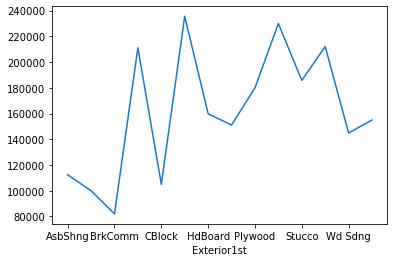

In [15]:
X_train.groupby(["Exterior1st"])['SalePrice'].mean().plot()

In [16]:
q = X_train.groupby(["Exterior1st"])['SalePrice'].mean()
q

Exterior1st
AsbShng    112426.666667
AsphShn    100000.000000
BrkComm     82000.000000
BrkFace    211124.242424
CBlock     105000.000000
CemntBd    235642.666667
HdBoard    159823.785235
MetalSd    151124.324138
Plywood    179982.924242
Stone      230000.000000
Stucco     185793.277778
VinylSd    212076.332394
Wd Sdng    144906.381295
WdShing    154956.666667
Name: SalePrice, dtype: float64

In [19]:
q = X_train.groupby(["Exterior1st"])['SalePrice'].mean().sort_values(ascending = True)
q

Exterior1st
BrkComm     82000.000000
AsphShn    100000.000000
CBlock     105000.000000
AsbShng    112426.666667
Wd Sdng    144906.381295
MetalSd    151124.324138
WdShing    154956.666667
HdBoard    159823.785235
Plywood    179982.924242
Stucco     185793.277778
BrkFace    211124.242424
VinylSd    212076.332394
Stone      230000.000000
CemntBd    235642.666667
Name: SalePrice, dtype: float64

In [20]:
q = X_train.groupby(["Exterior1st"])['SalePrice'].mean().sort_values(ascending = True).index
q

Index(['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'Wd Sdng', 'MetalSd',
       'WdShing', 'HdBoard', 'Plywood', 'Stucco', 'BrkFace', 'VinylSd',
       'Stone', 'CemntBd'],
      dtype='object', name='Exterior1st')

In [21]:
g = {j:i for i,j in enumerate(q , 0)}

In [22]:
g

{'BrkComm': 0,
 'AsphShn': 1,
 'CBlock': 2,
 'AsbShng': 3,
 'Wd Sdng': 4,
 'MetalSd': 5,
 'WdShing': 6,
 'HdBoard': 7,
 'Plywood': 8,
 'Stucco': 9,
 'BrkFace': 10,
 'VinylSd': 11,
 'Stone': 12,
 'CemntBd': 13}

In [23]:
X_train["Exterior1st"] = X_train["Exterior1st"].map(g)

C:\Users\korla\AppData\Local\Temp/ipykernel_4328/2965378514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Exterior1st"] = X_train["Exterior1st"].map(g)


In [24]:
X_train

,Neighborhood,Exterior1st,SalePrice
615,148104.597315,5,137500
613,158516.242424,11,147000
1303,221914.111111,11,232000
486,148104.597315,5,156000
561,158516.242424,7,170000
...,...,...,...
1095,201224.069307,11,176432
1130,139098.857143,6,135000
1294,130500.933333,6,115000
860,213999.648649,4,189950


In [25]:
X_test["Exterior1st"] = X_test["Exterior1st"].map(g)

C:\Users\korla\AppData\Local\Temp/ipykernel_4328/3722187084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Exterior1st"] = X_test["Exterior1st"].map(g)


In [26]:
X_test

,Neighborhood,Exterior1st,SalePrice
892,138186.363636,7.0,154500
1105,313633.629630,7.0,325000
413,132457.912500,6.0,115000
522,119879.487179,13.0,159000
1036,238072.703704,11.0,315500
...,...,...,...
1010,138186.363636,4.0,135000
390,130500.933333,5.0,119000
1409,189225.588235,8.0,215000
847,201224.069307,7.0,133500
